In [281]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import sympy as sym


In [299]:

lista = np.array([a00,a10,a01,a11])
x = sym.Symbol('x')
y = sym.Symbol('y')

def calcular_interpolacion(lista,x,y):
    suma = 0 
    for i in range(4):
        if i == 0 : 
            suma+=lista[i]
        if i == 2 :
            suma+=lista[i]*y
        if i == 1 :
            suma+=lista[i]*x
        if i == 3 : 
            suma+=lista[i]*y*x
    return suma

In [300]:
print(calcular_interpolacion(lista,x,y))

a00 + a01*y + a10*x + a11*x*y


In [101]:
position = np.zeros((4,2)) 
temperaturas = np.array([1,2,0.5,0.3]).T

P1 = [1,1]
P2 = [-1,1]
P3 = [-1,-1]
P4 = [1,-1]
vector = [P1,P2,P3,P4]

for i in range(4): 
    for j in range(2): 
        position[i,j] = vector[i][j]
        

In [229]:
x = position[:,0]
y = position[:,1]
print(position)

[[ 1.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 1. -1.]]


In [219]:
M = np.zeros((4,4))

for i in range(4):
     M[i] = [1, x[i] , y[i] , x[i]*y[i]]

In [104]:

M_inv = np.linalg.inv(M)
Solucion = M_inv@temperaturas


In [106]:
#comprobar 

Func_Temp = lambda p , x , y: p[0] + p[1]*x + p[2]*y + p[3]*x*y


In [185]:
print("para p1 T es:" ,  round(Func_Temp(Solucion , 1,1),3))
print("para p2 T es:" ,  round(Func_Temp(Solucion , -1,1),3))
print("para p3 T es:" ,  round(Func_Temp(Solucion , -1,-1),3))
print("para p4 T es:" ,  round(Func_Temp(Solucion , 1,-1),3))


para p1 T es: 1.0
para p2 T es: 2.0
para p3 T es: 0.5
para p4 T es: 0.3


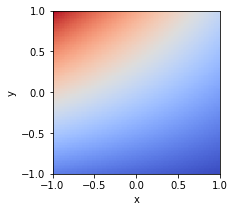

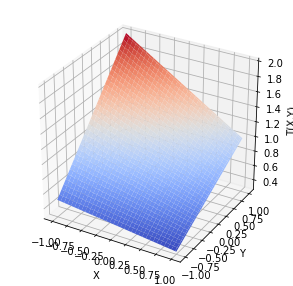

In [323]:
X = np.arange(-1,1.01, 0.02)
Y = np.arange(-1,1.01, 0.02)
X,Y = np.meshgrid(X,Y)
Z = X.copy()

filas = X.shape[0]
columnas = X.shape[1]

for i in range(filas): 
    for j in range(columnas):
        Z[i,j] =  Func_Temp(Solucion , X[i,j] , Y[i,j])

fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(1,1,1)
ax1.pcolor(X,Y,Z,cmap = "coolwarm") 
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot(1,1.5,1,projection = "3d")
ax2.plot_surface(X,Y,Z,cmap = "coolwarm") 
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('T(X,Y)')
plt.show()



In [ ]:
print("para p[0,0.5] T es:" ,  round(Func_Temp(Solucion , 0,0.5),3) , "K")

In [201]:

def Matriz_(theta ): 
    m = np.array([[np.cos(theta) , -np.sin(theta)] , [np.sin(theta) , np.cos(theta)]])
    return m

In [228]:
print(Matriz_(0))

[[ 1. -0.]
 [ 0.  1.]]


In [246]:

def rotacion ( Position , theta):
    rotados =[]
    for i in range(4): 
            rotados.append(Matriz_(theta)@Position[i])
            
    return np.array(rotados)
        

In [251]:

def interpolacion_rotada(P,theta,temperaturas):
    
    M = np.zeros((4,4))
    rotados = rotacion(position,theta)
    x2 = rotados[:,0]
    y2 = rotados[:,1]
    for i in range(4):
         M[i] = [1, x2[i] , y2[i] , x2[i]*y2[i]]
            
    M_inv = np.linalg.inv(M)
    Solucion = M_inv@temperaturas
    
    return Func_Temp(Solucion, 0 , 0.5)    


In [266]:
 print("la temperatura es: " , round(interpolacion_rotada(position,0,temperaturas),3),"K para theta = 0")
 print("la temperatura es: " , round(interpolacion_rotada(position, np.pi,temperaturas) , 3 ) , " K para theta = pi")
 print("la temperatura es: " , round(interpolacion_rotada(position,(3/2)* np.pi,temperaturas),3) , " K para theta = (3/2)pi")
 print("la temperatura es: " , round(interpolacion_rotada(position,2*np.pi,temperaturas) , 3), " K para theta = 2pi")

la temperatura es:  1.225 K para theta = 0
la temperatura es:  0.675  K para theta = pi
la temperatura es:  1.1  K para theta = (3/2)pi
la temperatura es:  1.225  K para theta = 2pi


In [330]:
theta = np.linspace(0,2*np.pi , 200)

def hallar_angulo_p_minimo(theta , P , temperaturas): 
    minimo = 2
    temp = 0
    theta_opt = 0
    for i in range(len(theta)): 
        temp = interpolacion_rotada(P,theta[i],temperaturas)
        
        if temp < minimo :
            minimo = temp 
            theta_opt = theta[i]
            
    return ("T minima" , minimo) , ("en grados" , np.degrees(theta_opt)) , ("en radianes" ,theta_opt)
    

In [329]:
hallar_angulo_p_minimo(theta , position , temperaturas)

(0.6367664129532491,
 ('en grados', 151.95979899497488),
 ('en radianes', 2.652198823131082))